# **데이터 선정 이유 및 문제 유형**

평상시 (글로벌)이커머스, 마케팅 분야에 관심과 흥미가 있어 관련 데이터셋을 탐색하던 중 'Global_Superstore2'가 모델링 하기에 가장 많은 데이터를 가지고 있었을 뿐만 아니라 commerce와 관련된 여러 feature를 지녀 다양한 탐색이 가능할 것 같다고 판단되어 이 데이터를 선정하게 되었습니다.

데이터셋을 바탕으로 구상한 프로젝트 가상 시나리오는 다음과 같습니다.
> 온라인 쇼핑몰 A사는 일주일 뒤 현재 구매 고객들에게 '상품 쿠폰'을 이메일로 전송하여 구매를 유도하는 이벤트를 진행하려 한다. 그동안 이벤트로 인한 수익률이 계속 저조했기에 이번 이벤트 전에는 고객 데이터셋을 분석하여 고객들이 사용할 확률이 높은 쿠폰을 구성할 계획이다. **이를 위해 A사는 사내 데이터 분석팀에게 '어떤 상품으로 쿠폰을 구성해야 고객들이 추가 구매를 할 것인지'를 판단하는 분류 모델을 만들라고 지시하였다.** 모델 생성을 위해 데이터 분석팀은 고객 구매와 관련된 내역이 담긴 데이터를 제공받았다.

위 문제 상황을 해결하기 위해서는  **'구매자들이 특정 상품을 구매할 것인지 아닌지'**를 판단하는 모델을 만들어야 합니다. 즉, 쿠폰이 주어졌을 때 특정 상품을 '구매한다', '구매하지 않는다' 두 개의 클래스로 분류하는 **이진 분류(Binary classification)** 문제입니다. 따라서 타겟은 특정 상품의 구매 여부이며(0=구매하지 않는다, 1=구매한다) 특정 상품은 데이터가 많을 수록 좋을것이기 때문에, 지금까지 고객들이 선호하는 제품으로 구성하려 합니다.

**[columns]**

Row ID : 행 ID           
Order ID : 주문 ID       
Order Date : 주문 날짜       
Ship Date : 출고일      
Ship Mode : 배송 방식
  - 4 : Same day : 당일 발송
  - 3 : First Class : 1일 내 발송
  - 2 : Second Class : 3일 내 발송
  - 1 : Standard Class : 6일 내 발송

Customer ID : 고객 ID     
Customer Name : 고객 이름   
Segment : 고객 (세분화) 유형
  - Consumer : 일반 소비자
  - Corporate : 기업
  - Home Office  : 홈 오피스

City : 도시            
State : 주           
Country  : 나라        
Postal Code : 우편 번호     
Market : 시장
  - APAC(Asia Pacific Accreditation Cooperation, 아시아태평양 지역 연합체)
  - LATAM(LATin AMerica, 라틴 아메리카)    
  - EU(European Union, 유럽연합)        
  - US(United States)        
  - EMEA(Europe, the Middle East and Africa, 유럽+중동+아프리카)      
  - Africa    
  - Canada      

Region : 지역
  - Central           
  - South             
  - EMEA              
  - North             
  - Africa            
  - Oceania           
  - West              
  - Southeast Asia    
  - East              
  - North Asia        
  - Central Asia      
  - Caribbean         
  - Canada         

Product ID : 제품 ID      
Category : 상품 카테고리
 - Office Supplies : 사무용품   
 - Technology : 기술        
 - Furniture : 가구   

Sub-Category : 상품 세부 카테고리
  - Binders        
  - Storage        
  - Art            
  - Paper          
  - Chairs         
  - Phones         
  - Furnishings    
  - Accessories    
  - Labels         
  - Envelopes      
  - Supplies       
  - Fasteners      
  - Bookcases      
  - Copiers        
  - Appliances     
  - Machines       
  - Tables      

Product Name : 제품명    
Sales : 가격           
Quantity : 수량        
Discount : 할인율       
Profit : 수익          
Shipping Cost : 배송비   
Order Priority : 주문 우선순위
  - 4 : Critical
  - 3 : High
  - 2 : Medium
  - 1 : Low

In [ ]:
!pip install category_encoders
!pip install pdpbox
!pip install shap
!pip install catboost

     |████████████████████████████████| 80 kB 3.5 MB/s 
     |████████████████████████████████| 34.0 MB 90 kB/s 
     |████████████████████████████████| 13.1 MB 14.6 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=dd0dffeaa8bae4c770e637b585cae98b9e214c6ad2cff3300dc3780da0e956f6
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 356 kB 5.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491648 sha256=4eb0745ed5afda60d6dc09bd78f9d175119301b419ccb7e5807fd23710de1f26
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap
     |████████████████████████████████| 67.4 MB 95 kB/s 


In [ ]:
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 사이킷런 - 데이터 셋 나누기
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

#사이킷런 - 교차검증
from sklearn.model_selection import cross_val_score

# 사이킷런 - encoders & imputers
from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer 

# 사이킷런 - 파이프라인
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 학습모델
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# 하이퍼파라미터 조정
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import uniform, truncnorm, randint

# 사이킷런 - 모델 평가 지표
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# 모델 해석
from xgboost import plot_importance
from lightgbm import plot_importance

ModuleNotFoundError: ignored

# **타겟 및 평가지표 설정**

### 그래프 폰트 관련 설정 코드

In [ ]:
# 나눔 글꼴 설치 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.font_manager as fm

# 이미 설치되어있는 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXNonUnicode',
 'cmr10',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'STIXGeneral',
 'STIXNonUnicode',
 'cmb10',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'cmmi10',
 'STIXNonUnicode',
 'cmsy10',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Serif',
 'cmtt10',
 'DejaVu Serif Display',
 'cmss10',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'cmex10',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'Liberation Sans',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'Liberation Mono',
 'NanumSquare',
 'NanumSquareRound',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'NanumGothic',
 'Liberation Sans',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'NanumMyeongjo',
 'Liberation Mono',
 'NanumSquareRound',
 'NanumBarunGothic'

In [ ]:
import matplotlib as mpl

#font 설정 파일 위치 출력
mpl.matplotlib_fname()

'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc'

## 타겟 설정을 위한 데이터 분석
- 고객들이 많이(수량) 구입한 제품은 무엇인가?(a)
- 고객들이 빈번히(최빈값) 구입한 제품은 무엇인가?(b)
- 최근 많이 구매되는 제품은 무엇인가?(c)
- 최근 빈번히 구매되는 제품은 무엇인가?(d)
(최근 = 데이터셋에서 가장 최근인 2014년으로 설정하였습니다.)
- a,b,c,d 가 서로 유사한가?

In [ ]:
df = pd.read_csv("/content/Global_Superstore2.csv", encoding='latin 1')
df2 = df.copy()

In [ ]:
# 고객들이 많이(수량) 구입한 제품 (a) 
p1 = df2.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)[:100]
df_p1 = pd.DataFrame(p1)
print(p1)
p1_product = p1.index.tolist()

Product Name
Staples                                               876
Cardinal Index Tab, Clear                             337
Eldon File Cart, Single Width                         321
Rogers File Cart, Single Width                        262
Sanford Pencil Sharpener, Water Color                 259
                                                     ... 
Kleencut Letter Opener, Easy Grip                     141
Office Star Executive Leather Armchair, Adjustable    141
Eldon Box, Industrial                                 141
Rubbermaid Stacking Tray, Erganomic                   141
Smead Trays, Blue                                     140
Name: Quantity, Length: 100, dtype: int64


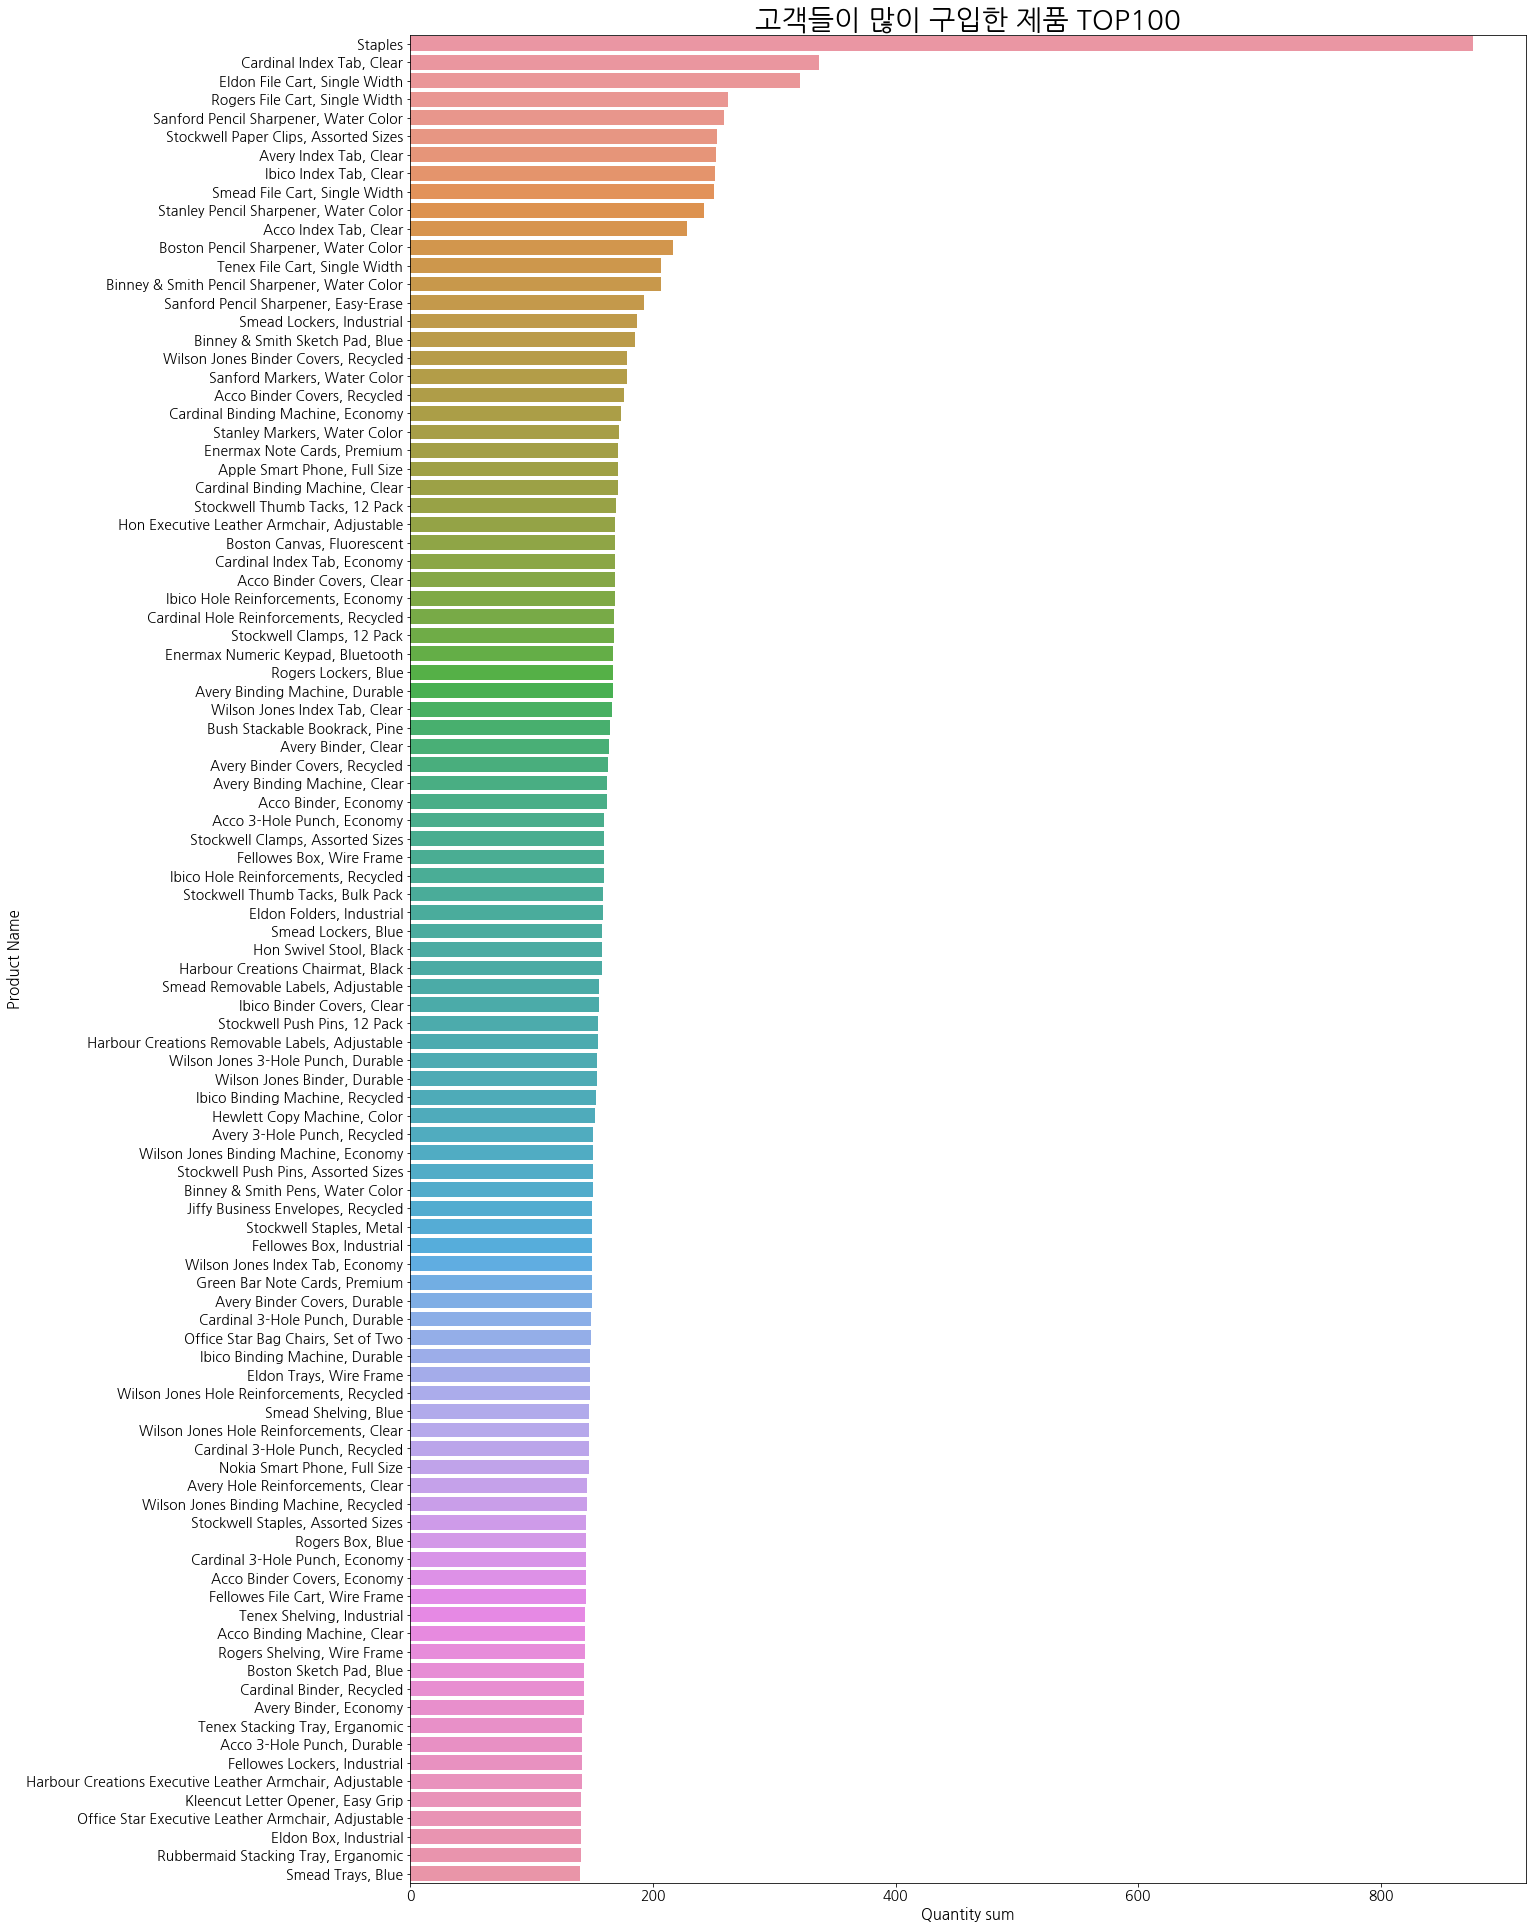

In [ ]:
# 시각화
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 34]
plt.rcParams['font.family'] = 'NanumGothic'
a = sns.barplot(x='Quantity', y=df_p1.index, data=df_p1)
a.set_title('고객들이 많이 구입한 제품 TOP100', fontsize=28)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Product Name', fontsize=15)
plt.xlabel('Quantity sum', fontsize=15)
plt.show()

In [ ]:
# 고객들이 빈번히(최빈값) 구입한 제품 (b) 
# a와 b동일
# a와 b 각각 4순위까지 동일
p2 = df2['Product Name'].value_counts()[:100]
df_p2 = pd.DataFrame(p2)
print(p2)
p2_product = p2.index.tolist()

Staples                                   227
Cardinal Index Tab, Clear                  92
Eldon File Cart, Single Width              90
Rogers File Cart, Single Width             84
Ibico Index Tab, Clear                     83
                                         ... 
Acco Binding Machine, Clear                41
Rogers File Cart, Industrial               41
Wilson Jones Binding Machine, Durable      41
Wilson Jones Binding Machine, Recycled     41
Tenex Lockers, Blue                        41
Name: Product Name, Length: 100, dtype: int64


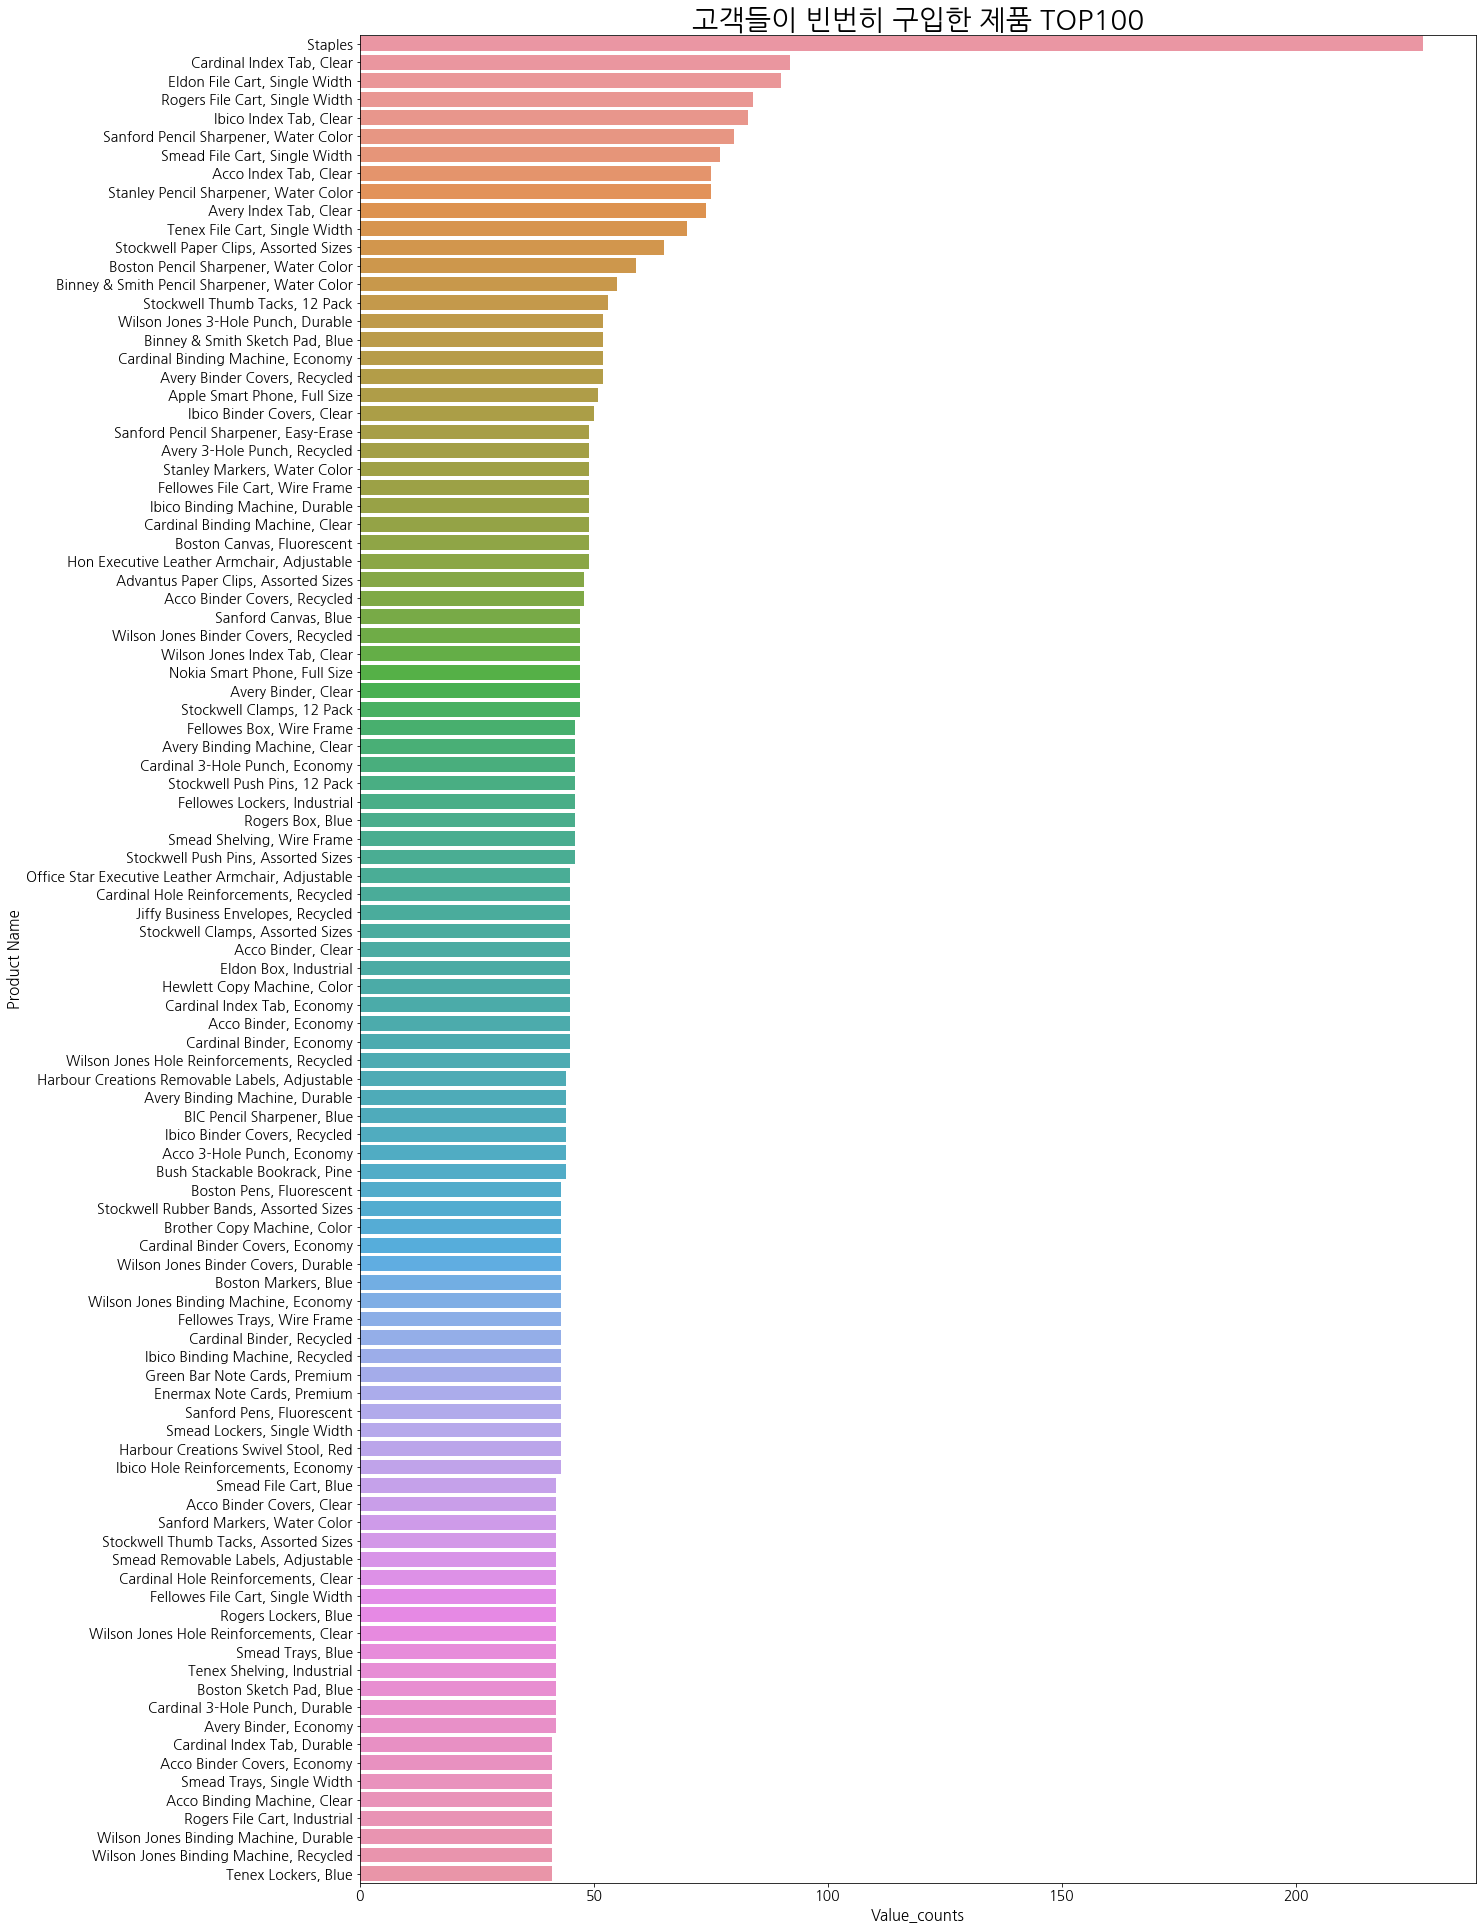

In [ ]:
# 시각화
plt.rcParams['figure.figsize'] = [20, 34]
plt.rcParams['font.family'] = 'NanumGothic'
a = sns.barplot(x='Product Name', y=df_p2.index, data=df_p2)
a.set_title('고객들이 빈번히 구입한 제품 TOP100', fontsize=28)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Product Name', fontsize=15)
plt.xlabel('Value_counts', fontsize=15)
plt.show()

In [ ]:
# 현재 데이터의 기간
pd.to_datetime(df2['Order Date']).min(), pd.to_datetime(df['Order Date']).max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2014-12-31 00:00:00'))

In [ ]:
# 최근 = 2014년으로 설정
cutOff = pd.to_datetime('2014-01-01')
recent_date = df2[pd.to_datetime(df['Order Date']) > cutOff]

# 최근 많이(수량) 구매되는 제품 (c)
p3 = recent_date.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)[:100]
df_p3 = pd.DataFrame(p3)
print(p3)
p3_product = p3.index.tolist()

Product Name
Staples                                       290
Stockwell Paper Clips, Assorted Sizes         135
Cardinal Index Tab, Clear                     105
Eldon File Cart, Single Width                  98
Rogers File Cart, Single Width                 94
                                             ... 
Samsung Office Telephone, Cordless             53
Wilson Jones 3-Hole Punch, Recycled            53
Motorola Smart Phone, Full Size                53
Rogers Trays, Wire Frame                       52
Avery Legal Exhibit Labels, 5000 Label Set     52
Name: Quantity, Length: 100, dtype: int64


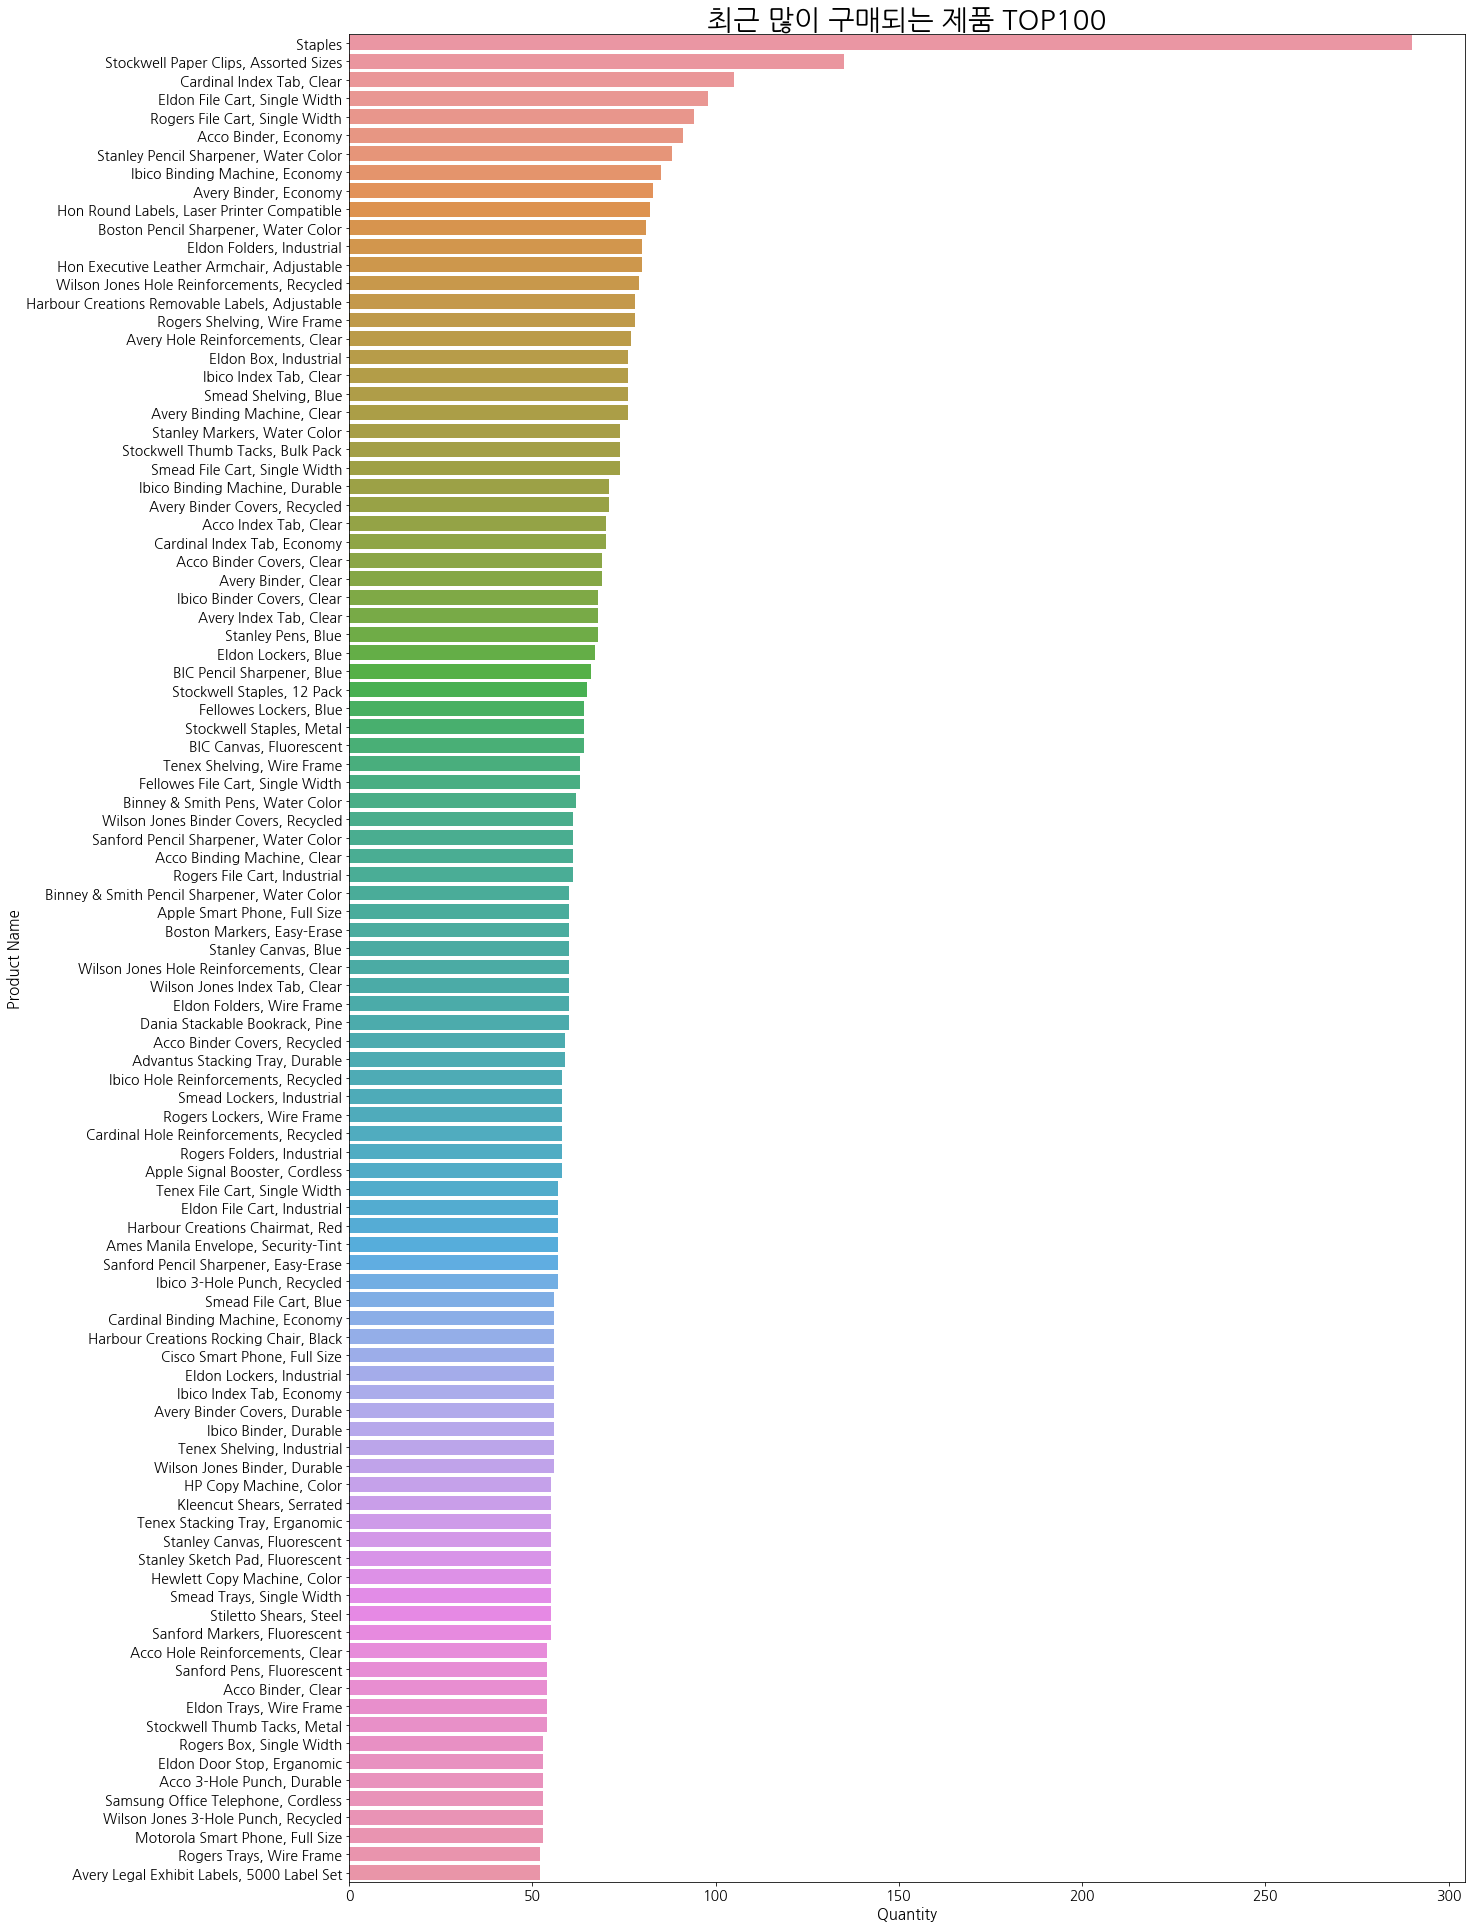

In [ ]:
# 시각화
plt.rcParams['figure.figsize'] = [20, 34]
plt.rcParams['font.family'] = 'NanumGothic'
a = sns.barplot(x='Quantity', y=df_p3.index, data=df_p3)
a.set_title('최근 많이 구매되는 제품 TOP100', fontsize=28)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Product Name', fontsize=15)
plt.xlabel('Quantity', fontsize=15)
plt.show()

In [ ]:
# 최근 빈번히 구매되는 제품 (d) 
# c와 d 동일
# c의 2순위가 Stockwell Paper Clips, Assorted Sizes인 것 외에는 4위까지 동일
p4 = recent_date['Product Name'].value_counts()[:100]
df_p4 = pd.DataFrame(p4)
print(p4)
p4_product = p4.index.tolist()

Staples                                  75
Cardinal Index Tab, Clear                33
Eldon File Cart, Single Width            31
Rogers File Cart, Single Width           30
Stockwell Paper Clips, Assorted Sizes    30
                                         ..
Boston Highlighters, Easy-Erase          16
Eldon Door Stop, Erganomic               16
Acco Hole Reinforcements, Durable        16
Sanford Pencil Sharpener, Easy-Erase     15
Ibico 3-Hole Punch, Recycled             15
Name: Product Name, Length: 100, dtype: int64


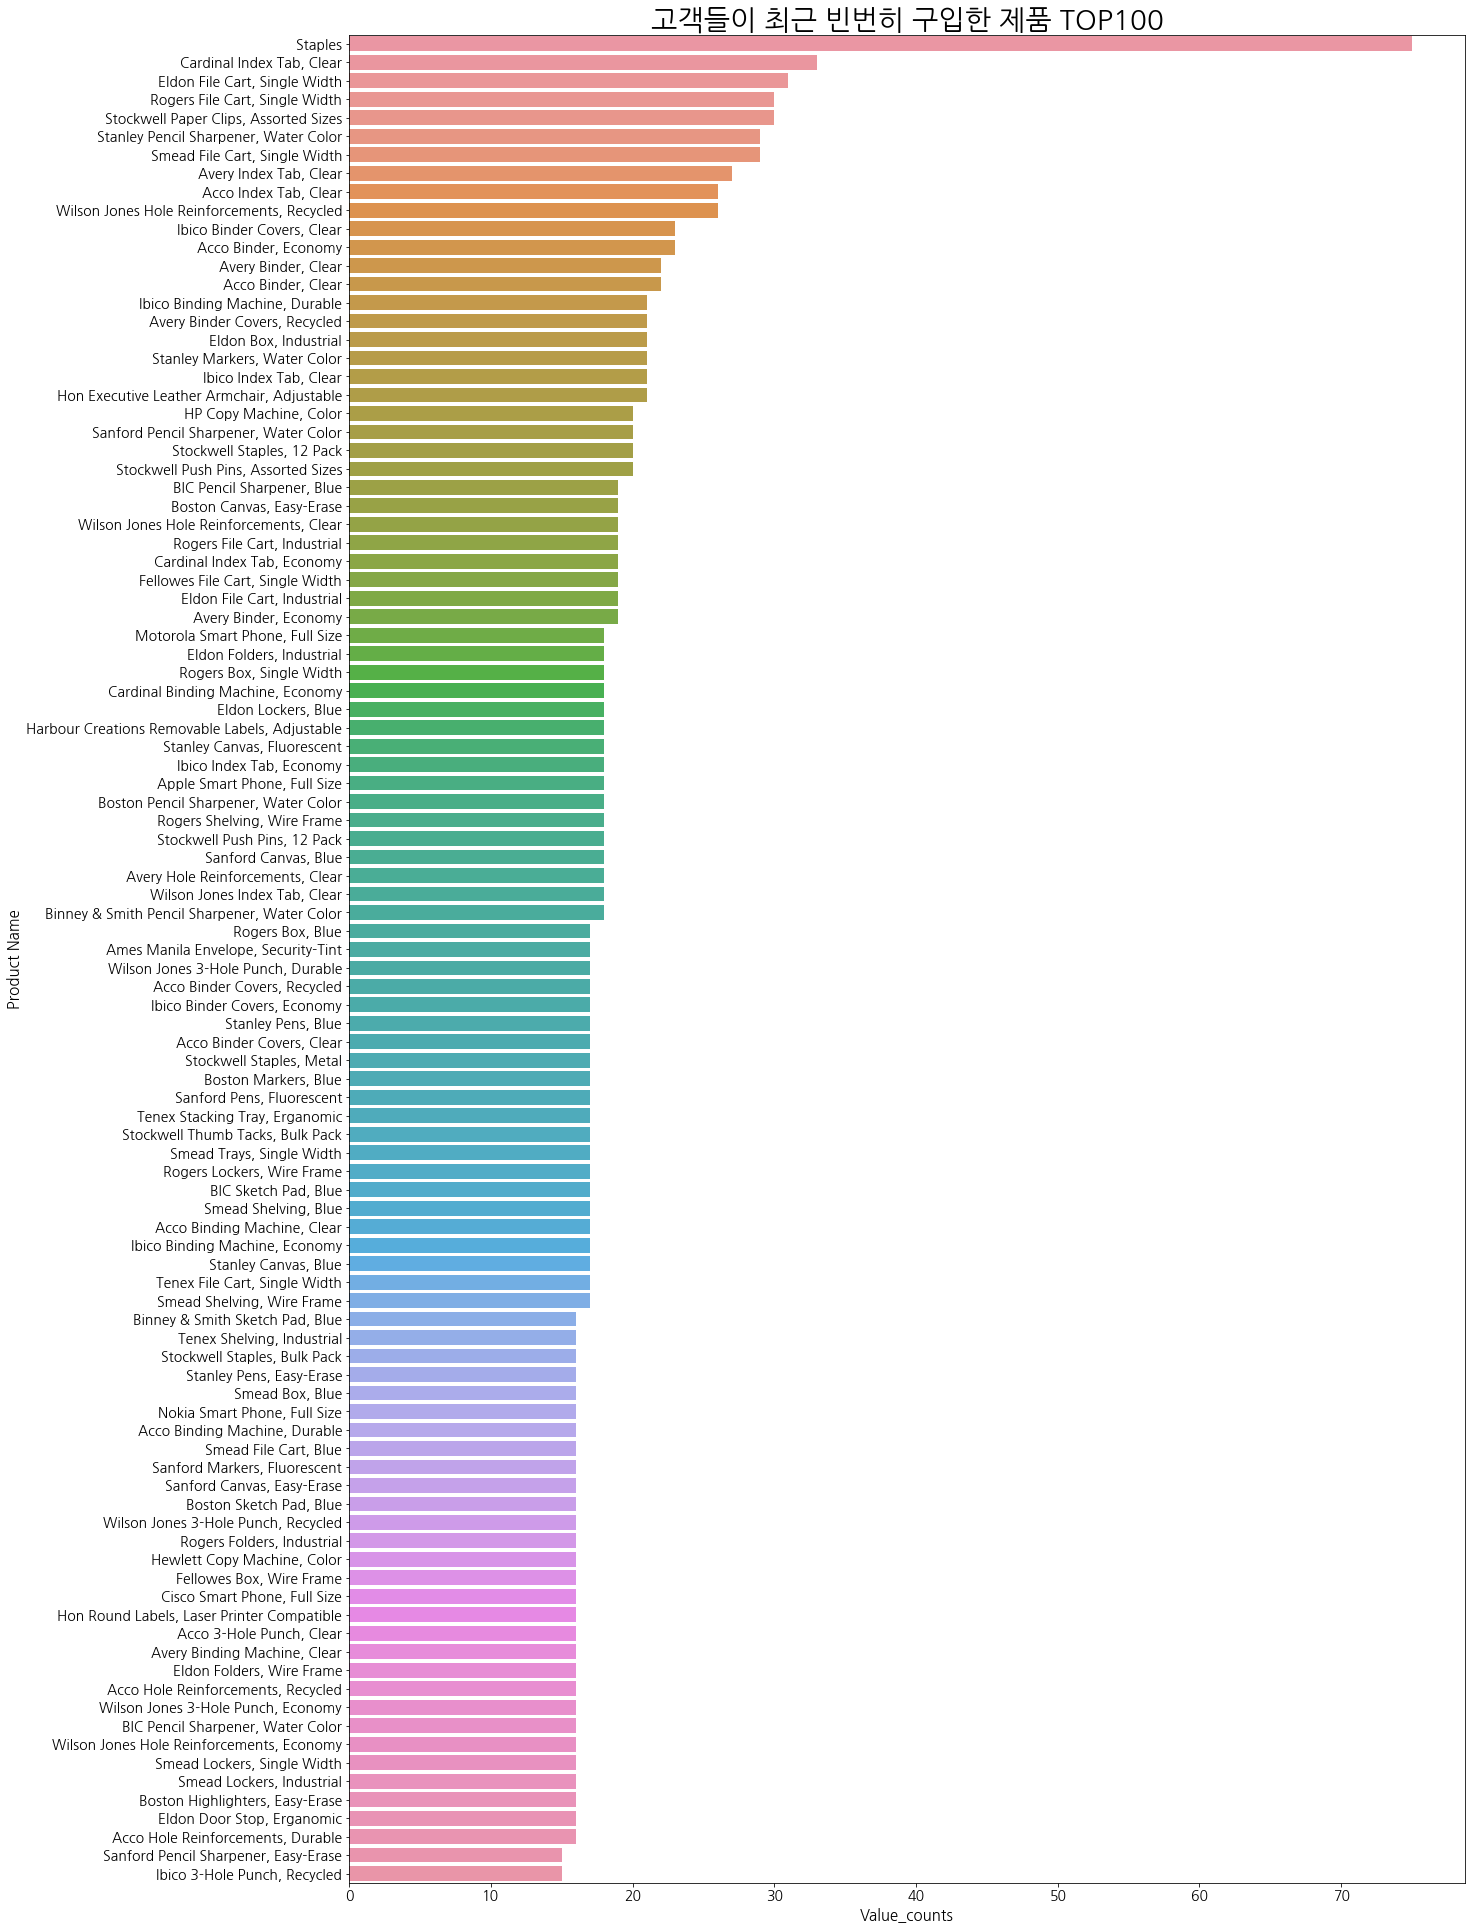

In [ ]:
# 시각화
plt.rcParams['figure.figsize'] = [20, 34]
plt.rcParams['font.family'] = 'NanumGothic'
a = sns.barplot(x='Product Name', y=df_p4.index, data=df_p4)
a.set_title('고객들이 최근 빈번히 구입한 제품 TOP100', fontsize=28)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Product Name', fontsize=15)
plt.xlabel('Value_counts', fontsize=15)
plt.show()

### Staples가 모든 조건에서 압도적으로 데이터 수가 많았고 c의 2순위가 상이한 것 외에는 a, b, c, d 모두 대체적으로 각 4순위까지 동일하였고 그 다음 순위 제품들도 크게 다르지 않았다.

1. Staples                                            
2. Cardinal Index Tab, Clear                          
3. Eldon File Cart, Single Width                      
4. Rogers File Cart, Single Width  
- c 2순위 : Stockwell Paper Clips, Assorted Sizes

### => 쿠폰 발행 시 전체 3788개 제품 중 **"상위 182 제품"**
* 타겟 클래스 비율이 너무 지나친 불균형이 되는 것을 방지하기 위해 a,b,c,d 조건에 부합하는 합집합 제품의 고유값으로 타겟을 설정하고 '상위 182 제품'이라 칭하였습니다.


## 타겟
상위 제품 항목 구매 여부를 binary로 나타낸 컬럼을 타겟으로 잡는다.

In [ ]:
# 타겟 구분 조건 = 각 조건의 합집합 품목
top_list = p1_product + p2_product + p3_product + p4_product
top_list = list(set(top_list))  # set : 고유값으로 변환, list : 다시 리스트 형태로 변환 
print(top_list)
len(top_list)

['Eldon Folders, Industrial', 'Avery Binding Machine, Durable', 'Smead Lockers, Industrial', 'Cardinal Index Tab, Clear', 'Acco 3-Hole Punch, Economy', 'Stanley Markers, Water Color', 'Acco 3-Hole Punch, Durable', 'Tenex Shelving, Industrial', 'Stanley Canvas, Blue', 'Boston Markers, Blue', 'BIC Pencil Sharpener, Blue', 'Fellowes File Cart, Single Width', 'Stockwell Rubber Bands, Assorted Sizes', 'Rogers File Cart, Single Width', 'Advantus Paper Clips, Assorted Sizes', 'Ibico Binding Machine, Economy', 'Cardinal Hole Reinforcements, Clear', 'Avery Hole Reinforcements, Clear', 'Wilson Jones Index Tab, Clear', 'Ibico Binder Covers, Economy', 'Stockwell Thumb Tacks, Assorted Sizes', 'Ibico Hole Reinforcements, Recycled', 'Tenex Stacking Tray, Erganomic', 'Sanford Canvas, Blue', 'Sanford Pencil Sharpener, Easy-Erase', 'Ibico Hole Reinforcements, Economy', 'Boston Canvas, Fluorescent', 'Sanford Markers, Fluorescent', 'Cardinal 3-Hole Punch, Economy', 'Cardinal Binder, Recycled', 'Boston Mar

181

In [ ]:
# 새로운 타겟 컬럼 생성 : 상위 종목을 구매했는지 안했는지(boolean)
df2 ["target"] = ""
for index in range(len(df2)):
    product = df2["Product Name"][index]
    
    if product in top_list:
      df2["target"][index] = int(1)
    else:
      df2["target"][index] = int(0)

df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,target
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,0
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,0
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,0
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,0
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,NaN,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium,0
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,77095.0,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium,0
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,93030.0,US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High,0
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,NaN,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium,0


In [ ]:
# 타겟 분포
df2['target'].value_counts(normalize=True)

0    0.845389
1    0.154611
Name: target, dtype: float64

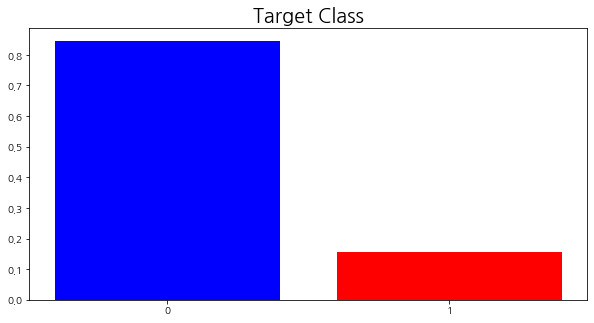

In [ ]:
# 시각화
plt.rcParams['figure.figsize'] = [10, 5]
plt.bar(['0', '1'], df2['target'].value_counts(normalize=True), color=['blue', 'red'])
plt.title('Target Class', fontsize=20)
plt.show()

## 평가지표
타겟이 불균일하게 분포되어있으므로 한 쪽 레이블에 치우치지 않는 레이블의 전체적인 성능에 대해 올바르게 평가할 수 있는 **"f1 score"**로 지정한다.

# **베이스 라인**
분류 문제이므로 타겟 label의 최빈 클래스인 0으로 기준모델을 정의합니다. 즉, 쿠폰을 통해 모든 구매자들이 상품을 구매하지 않을 것이라 예측하는 것으로, 정확도는 0.84이며 현재 만들어야 하는 모델은 정확도가 이보다 높아야 학습이 잘 되었다고 판단할 수 있습니다. 

# **EDA / 데이터 전처리 / Feature Engineering**

In [ ]:
# 최빈값 확인 
base = y_train.mode()[0] # 0

# 기준모델 생성
basic_model = [base] * len(y_train)

# 기준모델 정확도 
print("basic_model accuracy : ", accuracy_score(y_train, basic_model))

basic_model accuracy :  0.8451452524858647


In [ ]:
df = pd.read_csv("/content/Global_Superstore2.csv", encoding='latin 1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


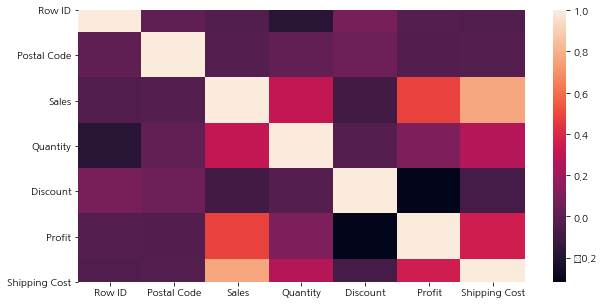

In [ ]:
# numeric feature들의 상관관계
sns.heatmap(df.corr())

In [ ]:
df.info()
# 'Postal Code'만 결측치 다수 존재
# object 형태의 data가 대다수
# columns 24개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [ ]:
df.describe(include='object')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,1430,1464,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4
top,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,135,130,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433


In [ ]:
# 중복값 확인 : 없음
df.T.duplicated()

Row ID            False
Order ID          False
Order Date        False
Ship Date         False
Ship Mode         False
Customer ID       False
Customer Name     False
Segment           False
City              False
State             False
Country           False
Postal Code       False
Market            False
Region            False
Product ID        False
Category          False
Sub-Category      False
Product Name      False
Sales             False
Quantity          False
Discount          False
Profit            False
Shipping Cost     False
Order Priority    False
dtype: bool

In [ ]:
# cardinality : high cardinality 다수 존재
df.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
Category,51290,3,Office Supplies,31273
Segment,51290,3,Consumer,26518
Order Priority,51290,4,Medium,29433
Ship Mode,51290,4,Standard Class,30775
Market,51290,7,APAC,11002
Region,51290,13,Central,11117
Sub-Category,51290,17,Binders,6152
Country,51290,147,United States,9994
Customer Name,51290,795,Muhammed Yedwab,108
State,51290,1094,California,2001


In [ ]:
# Product ID와 Product Name은 동일X
# Product ID : Category + Sub-Category + 숫자 조합, 중복값 존재
# Product Name : 같은 Product ID라도 옵션(색상, 크기 등)이 다를 수 있다. 
len(df[df['Product Name'].str.startswith('Novimex Executive Leather Armchair, Black')]), len(df[df['Product ID'].str.startswith('FUR-CH-10003950')])

(25, 10)

In [ ]:
# 동일 이름 존재하므로 Customer Name drop하고 Customer ID로 구분
len(df[df['Customer ID'] == 'RH-19495']), len(df[df['Customer Name'] == 'Rick Hansen'])

(49, 56)

- Ship Mode, Order Priority : Ordinal Encoding 필요
- 나머지 범주형 변수 : pipeline에서 Target Encoding 진행
- Row ID, Order ID, Customer Name, Postal Code : 불필요하고 결측치가 너무 많은 feature drop
- Product ID : 중복값으로 어떤 제품인지 알 수 없으므로 drop

In [ ]:
def engineer(df): 

  # Ordinal Encoding_Ship Mode
  # 배송 속도 순위에 따라 1부터 4까지로 환산 
  """
  4 : Same day : 당일 발송
  3 : First Class : 1일 내 발송
  2 : Second Class : 3일 내 발송
  1 : Standard Class : 6일 내 발송
  """
  df["Ship_Mode"] = ""
  for index in range(len(df)):
    shipmode = df["Ship_Mode"][index]

    if shipmode == "Same day":
      df["Ship_Mode"][index] = 4

    elif shipmode == "First Class":
      df["Ship_Mode"][index] = 3

    elif shipmode == "Second Class":
      df["Ship_Mode"][index] = 2

    elif shipmode == "Standard Class":
      df["Ship_Mode"][index] = 1

    else:
      df["Ship_Mode"][index] = int(0)

  df["Ship_Mode"] = pd.to_numeric(df["Ship_Mode"])
  df.drop(labels="Ship Mode", axis=1, inplace=True )


  # Ordinal Encoding_Order Priority
  # 우선 순위에 따라 1부터 4까지로 환산 
  """
  4 : Critical
  3 : High
  2 : Medium
  1 : Low
  """
  df["Order_Priority"] = ""
  for index in range(len(df)):
    priority = df["Order_Priority"][index]

    if priority == "Critical":
      df["Order_Priority"][index] = 4

    elif priority == "High":
      df["Order_Priority"][index] = 3

    elif priority == "Medium":
      df["Order_Priority"][index] = 2

    elif priority == "Low":
      df["Order_Priority"][index] = 1
      
    else:
      df["Order_Priority"][index] = 0

  df["Order_Priority"] = pd.to_numeric(df["Order_Priority"])
  df.drop(labels="Order Priority", axis=1, inplace=True )


  # 새로운 타겟 컬럼 생성 : 상위 종목을 구매했는지 안했는지(boolean)
  df["target"] = ""
  for index in range(len(df)):
      product = df["Product Name"][index]
      
      if product in top_list:
        df["target"][index] = 1
      else:
        df["target"][index] = 0

  df["target"] = pd.to_numeric(df["target"])


  # target leakage 방지
  df.drop(['Profit', 'Row ID', 'Order ID', 'Customer Name', 'Postal Code', 'Product Name', 'Product ID', 'Order Date', 'Ship Date'], axis=1, inplace=True)
  # 시간의 흐름에 상관없이 고객의 구매경향이 높은 상품을 분석하는 것이 목표이므로 날짜와 관련된 컬럼 모두 drop


engineer(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer ID     51290 non-null  object 
 1   Segment         51290 non-null  object 
 2   City            51290 non-null  object 
 3   State           51290 non-null  object 
 4   Country         51290 non-null  object 
 5   Market          51290 non-null  object 
 6   Region          51290 non-null  object 
 7   Category        51290 non-null  object 
 8   Sub-Category    51290 non-null  object 
 9   Sales           51290 non-null  float64
 10  Quantity        51290 non-null  int64  
 11  Discount        51290 non-null  float64
 12  Shipping Cost   51290 non-null  float64
 13  Ship_Mode       51290 non-null  int64  
 14  Order_Priority  51290 non-null  int64  
 15  target          51290 non-null  int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 6.3+ MB


In [ ]:
# 데이터 셋 나누기
train, test = train_test_split(df, test_size=0.2, random_state=0)

# Data leakage 방지-test, train 분리 확인
print(f'train과 test 데이터는 완전히 분리되었습니까? : {set(train.T).isdisjoint(set(test.T))}')


features = df.columns[:-1]
target = 'target'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

print(f'훈련 데이터 : {X_train.shape},{y_train.shape}')
print(f'테스트 데이터 : {X_test.shape},{y_test.shape}')

train과 test 데이터는 완전히 분리되었습니까? : True
훈련 데이터 : (41032, 15),(41032,)
테스트 데이터 : (10258, 15),(10258,)


# **모델링**

In [ ]:
# 모델 1_XGBClassifier
pipe = make_pipeline(
    TargetEncoder(),
    SimpleImputer(),
    XGBClassifier()
)

k = 5
scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='f1')

print(f'F1 ({k} folds):', scores)
print(f'평균 :', scores.mean())
print(f'표준 편차 :', scores.std())

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: Future

F1 (5 folds): [0.35222672 0.37263464 0.35914811 0.36427146 0.39314516]
평균 : 0.3682852189390428
표준 편차 : 0.014102528823392657


In [ ]:
# 하이퍼파라미터 조정1
dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    'targetencoder__min_samples_leaf': [2, 3, 5, 7], 
    'simpleimputer__strategy': ['mean', 'median'],
    'xgbclassifier__learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'xgbclassifier__gamma' : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
    'xgbclassifier__max_depth': [2, 4, 7, 10],     
    'xgbclassifier__colsample_bytree': [0.2, 0.3, 0.6, 0.8, 1.0], 
    'xgbclassifier__subsample': [0.2, 0.4, 0.5, 0.6, 0.7, 0.9],
    'xgbclassifier__reg_alpha': [0, 0.5, 1],
    'xgbclassifier__reg_lambda': [1, 1.5, 2, 3, 4.5],
    'xgbclassifier__min_child_weight' : [1, 3, 5, 7],
    'xgbclassifier__scale_pos_weight': [3, 5, 7, 9, 11]
}


clf = RandomizedSearchCV(
    pipe, 
    param_distributions = dists, 
    n_iter=100, 
    cv=3, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);


print('최적 하이퍼파라미터2: ', clf.best_params_)
print('f1 : ', clf.best_score_)
pipe = clf.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   52.1s finished
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


최적 하이퍼파라미터2:  {'xgbclassifier__subsample': 0.6, 'xgbclassifier__scale_pos_weight': 3, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__reg_alpha': 0, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__gamma': 0.3, 'xgbclassifier__colsample_bytree': 0.6, 'targetencoder__smoothing': 50.0, 'targetencoder__min_samples_leaf': 2, 'simpleimputer__strategy': 'median'}
f1 :  0.5228904353723487


In [ ]:
# 하이퍼파라미터 조정2
# dists = {
#     'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
#     'targetencoder__min_samples_leaf': [2,3,5,7], 
#     'simpleimputer__strategy': ['mean', 'median'],
#     'xgbclassifier__learning_rate' : [0.1, 0.01, 0.001],
#     'xgbclassifier__gamma' : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
#     'xgbclassifier__max_depth': [2, 4, 7, 10],     
#     'xgbclassifier__colsample_bytree': [0.3, 0.6, 0.8, 1.0], 
#     'xgbclassifier__subsample': [0.2, 0.4, 0.5, 0.6, 0.7],
#     'xgbclassifier__reg_alpha': [0, 0.5, 1],
#     'xgbclassifier__reg_lambda': [1, 1.5, 2, 3, 4.5],
#     'xgbclassifier__min_child_weight' : [1, 3, 5, 7],
#     'xgbclassifier__scale_pos_weight': [3,5,7,9]
# }


# clf = RandomizedSearchCV(
#     pipe, 
#     param_distributions = dists, 
#     n_iter=100, 
#     cv=3, 
#     scoring='f1',  
#     verbose=1,
#     n_jobs=-1
# )

# clf.fit(X_train, y_train);


# print('최적 하이퍼파라미터: ', clf.best_params_)
# print('f1 : ', clf.best_score_)
# pipe = clf.best_estimator_

In [ ]:

# 하이퍼파라미터 조정3
# dists = {
#     'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
#     'targetencoder__min_samples_leaf': [2, 3, 5, 7], 
#     'simpleimputer__strategy': ['mean', 'median'],
#     'xgbclassifier__learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
#     'xgbclassifier__gamma' : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
#     'xgbclassifier__max_depth': [2, 4, 7, 10],     
#     'xgbclassifier__colsample_bytree': [0.2, 0.3, 0.6, 0.8, 1.0], 
#     'xgbclassifier__subsample': [0.2, 0.4, 0.5, 0.6, 0.7, 0.9],
#     'xgbclassifier__reg_alpha': [0, 0.5, 1],
#     'xgbclassifier__reg_lambda': [1, 1.5, 2, 3, 4.5],
#     'xgbclassifier__min_child_weight' : [1, 3, 5, 7],
#     'xgbclassifier__scale_pos_weight': [3, 5, 7, 9, 11]
# }


# clf = GridSearchCV(
#     pipe, 
#     param_grid=dists,  
#     scoring='f1',
#     n_jobs=-1,
#     cv=5, 
#     refit=True
# )

# clf.fit(X_train, y_train);


# print('최적 하이퍼파라미터3: ', clf.best_params_)
# print('f1 : ', clf.best_score_)
# pipe = clf.best_estimator_

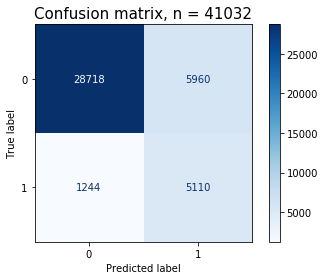

In [ ]:
#sklearn.metrics.plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_train, y_train,
                            cmap=plt.cm.Blues,
                            ax=ax, values_format='d');    #values_format=테이블 데이터 값 표시방법
plt.title(f'Confusion matrix, n = {len(y_train)}', fontsize=15)
plt.show()

In [ ]:
pipe.named_steps

{'simpleimputer': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='median', verbose=0),
 'targetencoder': TargetEncoder(cols=['Customer ID', 'Segment', 'City', 'State', 'Country',
                     'Market', 'Region', 'Category', 'Sub-Category'],
               drop_invariant=False, handle_missing='value',
               handle_unknown='value', min_samples_leaf=2, return_df=True,
               smoothing=50.0, verbose=0),
 'xgbclassifier': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.6, gamma=0.3,
               learning_rate=0.01, max_delta_step=0, max_depth=2,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=2, scale_pos_weight=3, seed=None,
               silent=None, subsample=0.6, verbosity=1)}

In [ ]:
# 모델 2_CatBoostClassifier
pipe2 = make_pipeline(
    TargetEncoder(),
    SimpleImputer(),
    CatBoostClassifier(loss_function='MultiClass', class_weights=[.16, .85])
)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

scores = cross_val_score(pipe2, X_train, y_train, scoring='f1', cv=cv,
                          n_jobs=-1, error_score='raise')

print(f'F1:', scores)
print(f'평균 :', scores.mean())
print(f'표준 편차 :', scores.std())

F1: [0.51070529 0.51453044 0.50577584 0.50334501 0.49428934 0.49740597
 0.49320857 0.49428208 0.49213342 0.50745322 0.50047453 0.49701539
 0.50407013 0.50684495 0.50508788]
평균 : 0.5017748046746608
표준 편차 : 0.006618501924534638


In [ ]:
# 하이퍼파라미터 조정
dists2 = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    'targetencoder__min_samples_leaf': [2,3,5,7], 
    'simpleimputer__strategy': ['mean', 'median'],
    'catboostclassifier__one_hot_max_size' : [2,3,4,5],
    'catboostclassifier__max_depth': [2, 3, 4, 7, 10],     
    'catboostclassifier__learning_rate': [0.1, 0.01, 0.001, 0.0001], 
    'catboostclassifier__n_estimators': [50, 100, 150, 200, 250]
}


clf = RandomizedSearchCV(
    pipe2, 
    param_distributions = dists2, 
    n_iter=100, 
    cv=3, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);


print('최적 하이퍼파라미터: ', clf.best_params_)
print('f1 : ', clf.best_score_)
pipe2 = clf.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.9min finished
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0:	learn: 0.6931034	total: 56.4ms	remaining: 5.58s
1:	learn: 0.6930597	total: 63.1ms	remaining: 3.09s
2:	learn: 0.6930157	total: 69.7ms	remaining: 2.25s
3:	learn: 0.6929709	total: 77ms	remaining: 1.85s
4:	learn: 0.6929274	total: 83.2ms	remaining: 1.58s
5:	learn: 0.6928834	total: 89.7ms	remaining: 1.41s
6:	learn: 0.6928404	total: 96.2ms	remaining: 1.28s
7:	learn: 0.6927957	total: 103ms	remaining: 1.18s
8:	learn: 0.6927513	total: 110ms	remaining: 1.11s
9:	learn: 0.6927080	total: 117ms	remaining: 1.05s
10:	learn: 0.6926635	total: 125ms	remaining: 1.01s
11:	learn: 0.6926191	total: 131ms	remaining: 963ms
12:	learn: 0.6925749	total: 139ms	remaining: 930ms
13:	learn: 0.6925319	total: 146ms	remaining: 898ms
14:	learn: 0.6924878	total: 153ms	remaining: 864ms
15:	learn: 0.6924453	total: 159ms	remaining: 834ms
16:	learn: 0.6924004	total: 166ms	remaining: 808ms
17:	learn: 0.6923558	total: 172ms	remaining: 784ms
18:	learn: 0.6923109	total: 179ms	remaining: 762ms
19:	learn: 0.6922674	total: 185ms	re

In [ ]:
pipe2.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0:	learn: 0.6931034	total: 8.53ms	remaining: 844ms
1:	learn: 0.6930597	total: 15.6ms	remaining: 766ms
2:	learn: 0.6930157	total: 22.5ms	remaining: 727ms
3:	learn: 0.6929709	total: 29.2ms	remaining: 702ms
4:	learn: 0.6929274	total: 36.1ms	remaining: 687ms
5:	learn: 0.6928834	total: 43ms	remaining: 674ms
6:	learn: 0.6928404	total: 49.9ms	remaining: 662ms
7:	learn: 0.6927957	total: 56.9ms	remaining: 655ms
8:	learn: 0.6927513	total: 64.2ms	remaining: 649ms
9:	learn: 0.6927080	total: 72.1ms	remaining: 649ms
10:	learn: 0.6926635	total: 79.5ms	remaining: 643ms
11:	learn: 0.6926191	total: 86.8ms	remaining: 637ms
12:	learn: 0.6925749	total: 93.9ms	remaining: 628ms
13:	learn: 0.6925319	total: 101ms	remaining: 622ms
14:	learn: 0.6924878	total: 108ms	remaining: 614ms
15:	learn: 0.6924453	total: 115ms	remaining: 604ms
16:	learn: 0.6924004	total: 122ms	remaining: 598ms
17:	learn: 0.6923558	total: 130ms	remaining: 590ms
18:	learn: 0.6923109	total: 137ms	remaining: 582ms
19:	learn: 0.6922674	total: 14

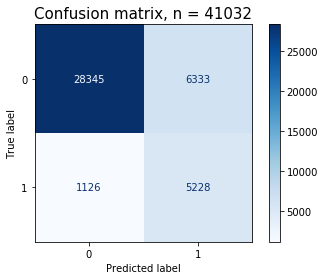

In [ ]:
#sklearn.metrics.plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe2, X_train, y_train,
                            cmap=plt.cm.Blues,
                            ax=ax, values_format='d');  
plt.title(f'Confusion matrix, n = {len(y_train)}', fontsize=15)
plt.show()

In [ ]:
pipe2.named_steps

{'catboostclassifier': <catboost.core.CatBoostClassifier at 0x7feffcb97890>,
 'simpleimputer': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='mean', verbose=0),
 'targetencoder': TargetEncoder(cols=['Customer ID', 'Segment', 'City', 'State', 'Country',
                     'Market', 'Region', 'Category', 'Sub-Category'],
               drop_invariant=False, handle_missing='value',
               handle_unknown='value', min_samples_leaf=5, return_df=True,
               smoothing=2.0, verbose=0)}

# **모델 예측 및 해석**

In [ ]:
#모델 예측
y_pred = pipe2.predict(X_test)
print('검증 f1: ', f1_score(y_test, y_pred))

검증 f1:  0.5161140737305819


In [ ]:
!pip install eli5

     |████████████████████████████████| 106 kB 5.4 MB/s 


In [ ]:
# Permutation Importance(MDA)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipe.named_steps['xgbclassifier'], 
    scoring='f1', 
    n_iter=5, 
    random_state=2
)

X_train_transformed1 = pipe.named_steps['targetencoder'].transform(X_train)
X_train_transformed2 = pipe.named_steps['simpleimputer'].transform(X_train_transformed1)

permuter.fit(X_train_transformed2, y_train);


# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=X_train.columns.tolist()
)

Weight,Feature
0.2951 ± 0.0082,Sub-Category
0.0886 ± 0.0065,City
0.0198 ± 0.0057,Category
0.0048 ± 0.0020,State
0.0001 ± 0.0002,Customer ID
0.0000 ± 0.0001,Sales
0 ± 0.0000,Order_Priority
0 ± 0.0000,Ship_Mode
0 ± 0.0000,Shipping Cost
0 ± 0.0000,Profit


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


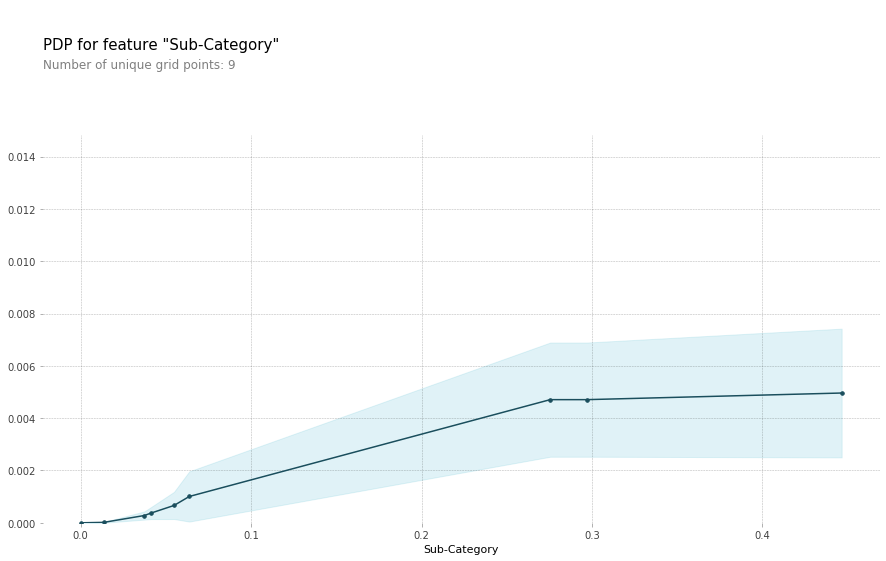

In [ ]:
# PDP : Permutation Importance 상위 3개 특성
# Sub-Category
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox import pdp

feature = 'Sub-Category'
encoder = pipe2.named_steps['targetencoder']
X_encoded = encoder.fit_transform(X_train, y_train)
cf = pipe2.named_steps['catboostclassifier']

pdp_dist = pdp.pdp_isolate(model=cf, dataset=X_encoded, model_features=X_train.columns.tolist(), feature=feature)
pdp.pdp_plot(pdp_dist, feature);

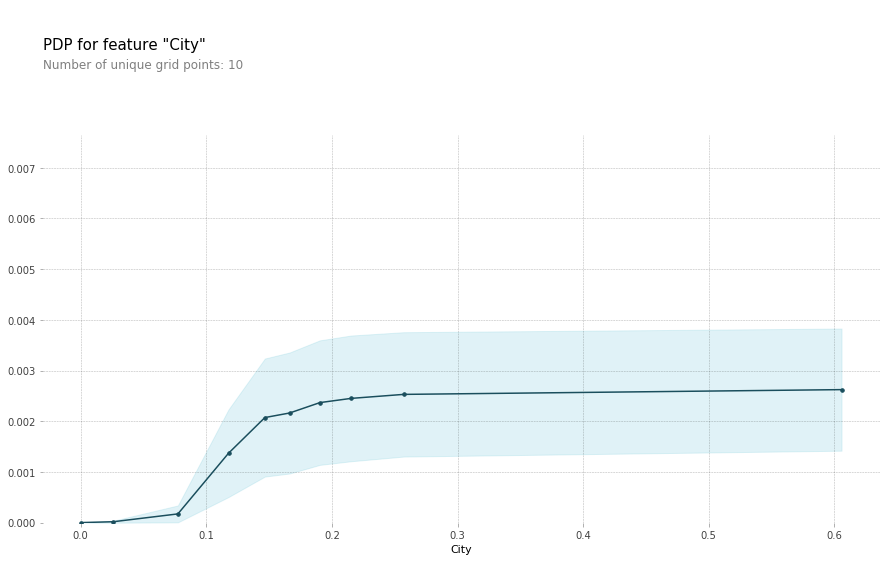

In [ ]:
# City
feature = 'City'
encoder = pipe2.named_steps['targetencoder']
X_encoded = encoder.fit_transform(X_train, y_train)
cf = pipe2.named_steps['catboostclassifier']

pdp_dist = pdp.pdp_isolate(model=cf, dataset=X_encoded, model_features=X_train.columns.tolist(), feature=feature)
pdp.pdp_plot(pdp_dist, feature);

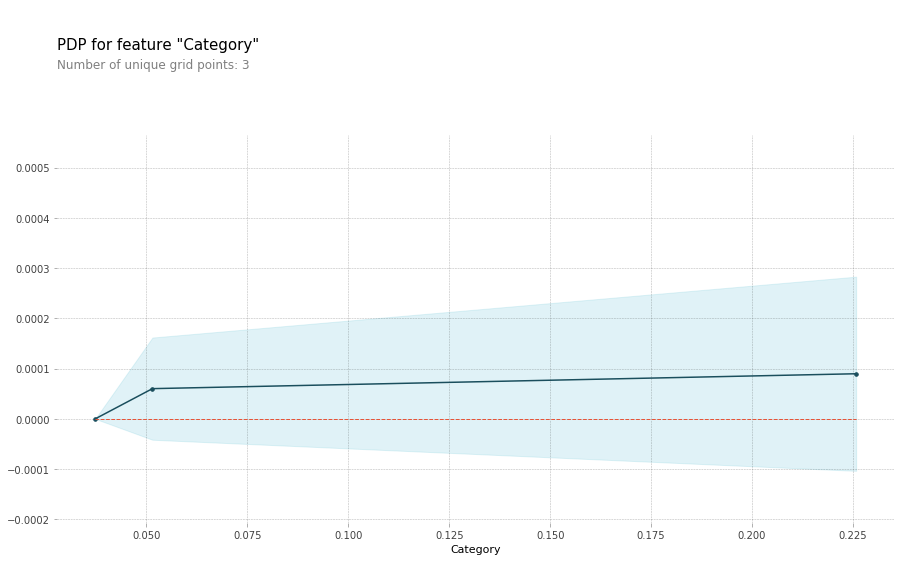

In [ ]:
# Category
feature = 'Category'
encoder = pipe2.named_steps['targetencoder']
X_encoded = encoder.fit_transform(X_train, y_train)
cf = pipe2.named_steps['catboostclassifier']

pdp_dist = pdp.pdp_isolate(model=cf, dataset=X_encoded, model_features=X_train.columns.tolist(), feature=feature)
pdp.pdp_plot(pdp_dist, feature);